In [1]:
import statistics
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Prepare data

In [2]:
strong_results_time_1e6 = { "parallel_strong_1_nodes_points_1e6": _ ,
                            "parallel_strong_2_nodes_points_1e6": _ ,
                            "parallel_strong_3_nodes_points_1e6": _ ,
                            "parallel_strong_4_nodes_points_1e6": _ ,
                            "parallel_strong_5_nodes_points_1e6": _ ,
                            "parallel_strong_6_nodes_points_1e6": _ ,
                            "parallel_strong_7_nodes_points_1e6": _ ,
                            "parallel_strong_8_nodes_points_1e6": _ ,
                            "parallel_strong_9_nodes_points_1e6": _ ,
                            "parallel_strong_10_nodes_points_1e6": _ ,
                            "parallel_strong_11_nodes_points_1e6": _ ,
                            "parallel_strong_12_nodes_points_1e6": _ }

strong_results_time_1e8 = { "parallel_strong_1_nodes_points_1e8": _ ,
                            "parallel_strong_2_nodes_points_1e8": _ ,
                            "parallel_strong_3_nodes_points_1e8": _ ,
                            "parallel_strong_4_nodes_points_1e8": _ ,
                            "parallel_strong_5_nodes_points_1e8": _ ,
                            "parallel_strong_6_nodes_points_1e8": _ ,
                            "parallel_strong_7_nodes_points_1e8": _ ,
                            "parallel_strong_8_nodes_points_1e8": _ ,
                            "parallel_strong_9_nodes_points_1e8": _ ,
                            "parallel_strong_10_nodes_points_1e8": _ ,
                            "parallel_strong_11_nodes_points_1e8": _ ,
                            "parallel_strong_12_nodes_points_1e8": _ }

strong_results_time_1e10 = {    "parallel_strong_1_nodes_points_1e10": _ ,
                                "parallel_strong_2_nodes_points_1e10": _ ,
                                "parallel_strong_3_nodes_points_1e10": _ ,
                                "parallel_strong_4_nodes_points_1e10": _ ,
                                "parallel_strong_5_nodes_points_1e10": _ ,
                                "parallel_strong_6_nodes_points_1e10": _ ,
                                "parallel_strong_7_nodes_points_1e10": _ ,
                                "parallel_strong_8_nodes_points_1e10": _ ,
                                "parallel_strong_9_nodes_points_1e10": _ ,
                                "parallel_strong_10_nodes_points_1e10": _ ,
                                "parallel_strong_11_nodes_points_1e10": _ ,
                                "parallel_strong_12_nodes_points_1e10": _ }

weak_results_time_1e6 = {   "parallel_weak_1_nodes_points_1e6": _ ,
                            "parallel_weak_2_nodes_points_1e6": _ ,
                            "parallel_weak_3_nodes_points_1e6": _ ,
                            "parallel_weak_4_nodes_points_1e6": _ ,
                            "parallel_weak_5_nodes_points_1e6": _ ,
                            "parallel_weak_6_nodes_points_1e6": _ ,
                            "parallel_weak_7_nodes_points_1e6": _ ,
                            "parallel_weak_8_nodes_points_1e6": _ ,
                            "parallel_weak_9_nodes_points_1e6": _ ,
                            "parallel_weak_10_nodes_points_1e6": _ ,
                            "parallel_weak_11_nodes_points_1e6": _ ,
                            "parallel_weak_12_nodes_points_1e6": _ }

weak_results_time_1e8 = {   "parallel_weak_1_nodes_points_1e8": _ ,
                            "parallel_weak_2_nodes_points_1e8": _ ,
                            "parallel_weak_3_nodes_points_1e8": _ ,
                            "parallel_weak_4_nodes_points_1e8": _ ,
                            "parallel_weak_5_nodes_points_1e8": _ ,
                            "parallel_weak_6_nodes_points_1e8": _ ,
                            "parallel_weak_7_nodes_points_1e8": _ ,
                            "parallel_weak_8_nodes_points_1e8": _ ,
                            "parallel_weak_9_nodes_points_1e8": _ ,
                            "parallel_weak_10_nodes_points_1e8": _ ,
                            "parallel_weak_11_nodes_points_1e8": _ ,
                            "parallel_weak_12_nodes_points_1e8": _ }

weak_results_time_1e10 = {  "parallel_weak_1_nodes_points_1e10": _ ,
                            "parallel_weak_2_nodes_points_1e10": _ ,
                            "parallel_weak_3_nodes_points_1e10": _ ,
                            "parallel_weak_4_nodes_points_1e10": _ ,
                            "parallel_weak_5_nodes_points_1e10": _ ,
                            "parallel_weak_6_nodes_points_1e10": _ ,
                            "parallel_weak_7_nodes_points_1e10": _ ,
                            "parallel_weak_8_nodes_points_1e10": _ ,
                            "parallel_weak_9_nodes_points_1e10": _ ,
                            "parallel_weak_10_nodes_points_1e10": _ ,
                            "parallel_weak_11_nodes_points_1e10": _ ,
                            "parallel_weak_12_nodes_points_1e10": _ }

In [3]:
def get_strong_results_time_from_file(name):
    with open("parallel_log/strong/" + name + ".log", "r") as f:
        results = []
        for line in f:
            if line.startswith("General"):
                results.append(float(line.split(" ")[1].split("\n")[0]))
    return results

def get_weak_results_time_from_file(name):
    with open("parallel_log/weak/" + name + ".log", "r") as f:
        results = []
        for line in f:
            if line.startswith("General"):
                results.append(float(line.split(" ")[1].split("\n")[0]))
    return results

In [4]:
for name in strong_results_time_1e6:
    strong_results_time_1e6[name] = get_strong_results_time_from_file(name)

for name in strong_results_time_1e8:
    strong_results_time_1e8[name] = get_strong_results_time_from_file(name)
    
for name in strong_results_time_1e10:
    strong_results_time_1e10[name] = get_strong_results_time_from_file(name)

for name in weak_results_time_1e6:
    weak_results_time_1e6[name] = get_weak_results_time_from_file(name)
    
for name in weak_results_time_1e8:
    weak_results_time_1e8[name] = get_weak_results_time_from_file(name)
    
for name in weak_results_time_1e10:
    weak_results_time_1e10[name] = get_weak_results_time_from_file(name)

# Part 2: Create graphs

In [5]:
x_processors = np.array(list(range(1, 13)))

## Part 2.1: Strong scaling

### Time to number of processors

In [22]:
y_strong_time_1e6 = np.array([])
y_strong_time_1e8 = np.array([])
y_strong_time_1e10 = np.array([])

y_strong_time_1e6_error = np.array([])
y_strong_time_1e8_error = np.array([])
y_strong_time_1e10_error = np.array([])

for name in strong_results_time_1e6:
    result_mean = statistics.mean(strong_results_time_1e6[name])
    y_strong_time_1e6 = np.append(y_strong_time_1e6, result_mean)
    
    result_stdev = statistics.stdev(strong_results_time_1e6[name])
    y_strong_time_1e6_error = np.append(y_strong_time_1e6_error, result_stdev)

for name in strong_results_time_1e8:
    result_mean = statistics.mean(strong_results_time_1e8[name])
    y_strong_time_1e8 = np.append(y_strong_time_1e8, result_mean)
    
    result_stdev = statistics.stdev(strong_results_time_1e8[name])
    y_strong_time_1e8_error = np.append(y_strong_time_1e8_error, result_stdev)

for name in strong_results_time_1e10:
    result_mean = statistics.mean(strong_results_time_1e10[name])
    y_strong_time_1e10 = np.append(y_strong_time_1e10, result_mean)
    
    result_stdev = statistics.stdev(strong_results_time_1e10[name])
    y_strong_time_1e10_error = np.append(y_strong_time_1e10_error, result_stdev)

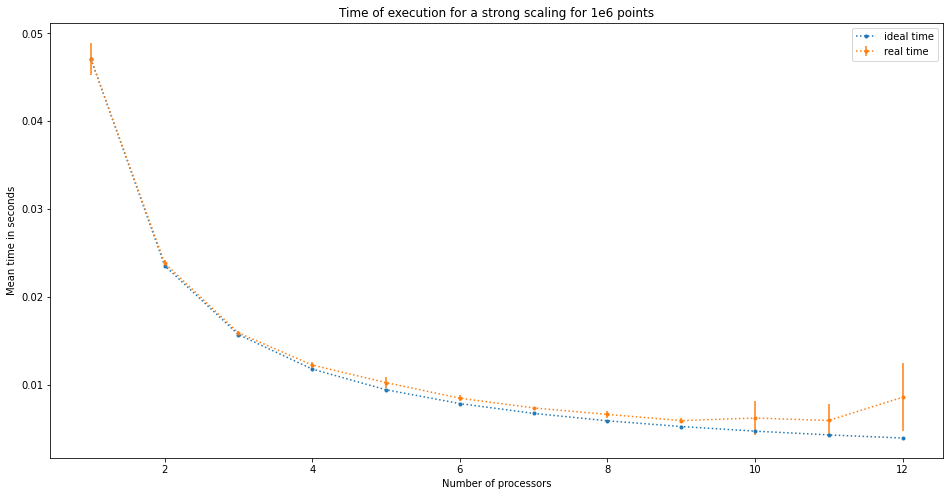

In [26]:
ideal_time = list(map(lambda x: y_strong_time_1e6[0]/x, x_processors))

plt.plot(x_processors, ideal_time, linestyle='dotted', marker='.', label='ideal time')
plt.errorbar(x_processors, y_strong_time_1e6, y_strong_time_1e6_error, linestyle='dotted', marker='.', label='real time')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Time of execution for a strong scaling for 1e6 points")
plt.ylabel("Mean time in seconds")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

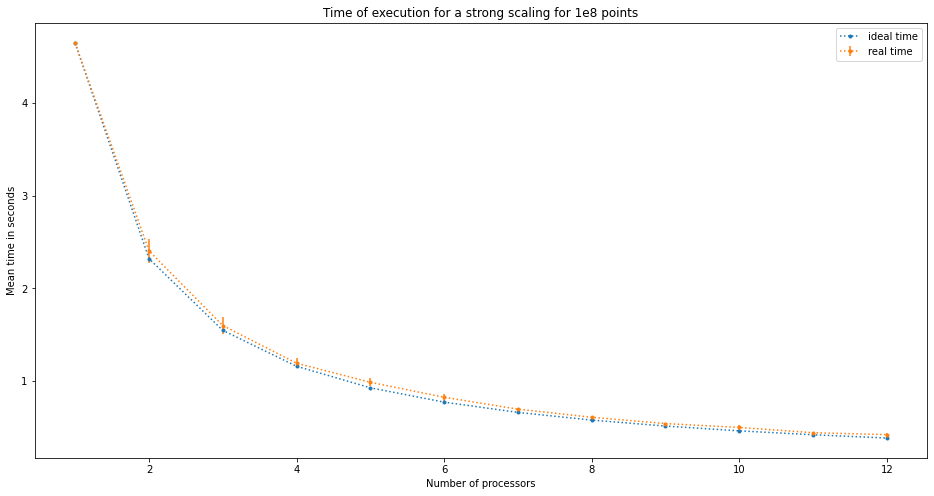

In [29]:
ideal_time = list(map(lambda x: y_strong_time_1e8[0]/x, x_processors))

plt.plot(x_processors, ideal_time, linestyle='dotted', marker='.', label='ideal time')
plt.errorbar(x_processors, y_strong_time_1e8, y_strong_time_1e8_error, linestyle='dotted', marker='.', label='real time')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Time of execution for a strong scaling for 1e8 points")
plt.ylabel("Mean time in seconds")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

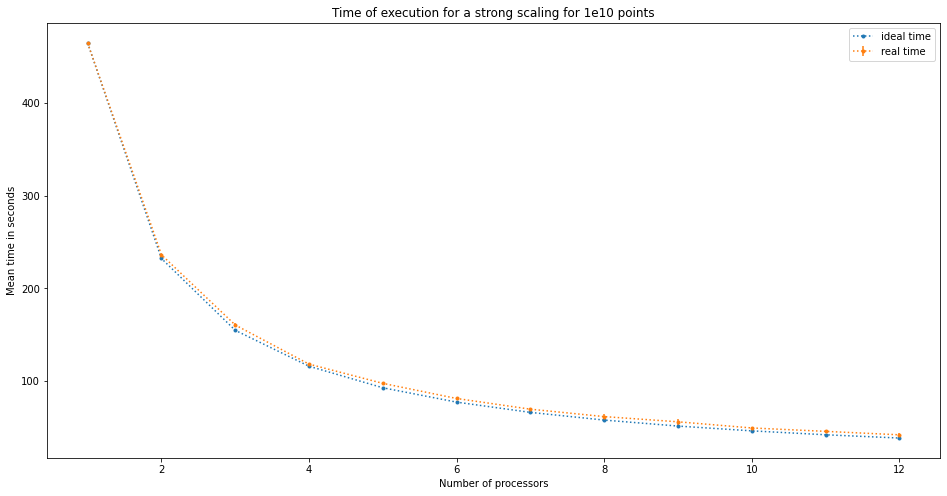

In [30]:
ideal_time = list(map(lambda x: y_strong_time_1e10[0]/x, x_processors))

plt.plot(x_processors, ideal_time, linestyle='dotted', marker='.', label='ideal time')
plt.errorbar(x_processors, y_strong_time_1e10, y_strong_time_1e10_error, linestyle='dotted', marker='.', label='real time')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Time of execution for a strong scaling for 1e10 points")
plt.ylabel("Mean time in seconds")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

### Speedup to number of processors

In [41]:
strong_scaling_speedup_1e6 = list(map(lambda x: y_strong_time_1e6[0]/x, y_strong_time_1e6))
strong_scaling_speedup_1e8 = list(map(lambda x: y_strong_time_1e8[0]/x, y_strong_time_1e8))
strong_scaling_speedup_1e10 = list(map(lambda x: y_strong_time_1e10[0]/x, y_strong_time_1e10))

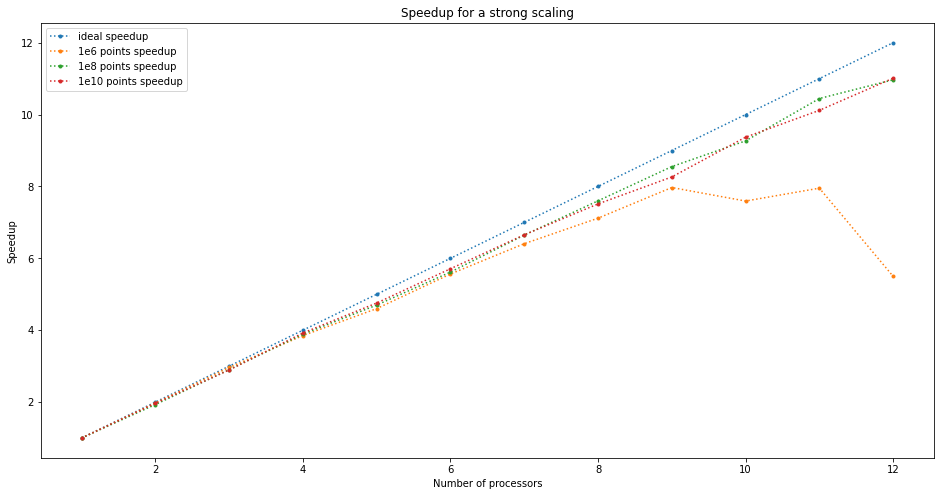

In [63]:
plt.plot(x_processors, x_processors, linestyle='dotted', marker='.', label='ideal speedup')
plt.plot(x_processors, strong_scaling_speedup_1e6, linestyle='dotted', marker='.', label='1e6 points speedup')
plt.plot(x_processors, strong_scaling_speedup_1e8, linestyle='dotted', marker='.', label='1e8 points speedup')
plt.plot(x_processors, strong_scaling_speedup_1e10, linestyle='dotted', marker='.', label='1e10 points speedup')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Speedup for a strong scaling")
plt.ylabel("Speedup")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

### Efficiency to number of processors

In [64]:
strong_scaling_speedup_1e6 = list(map(lambda x: 1/(x/y_strong_time_1e6[0]), y_strong_time_1e6))
strong_scaling_speedup_1e8 = list(map(lambda x: 1/(x/y_strong_time_1e8[0]), y_strong_time_1e8))
strong_scaling_speedup_1e10 = list(map(lambda x: 1/(x/y_strong_time_1e10[0]), y_strong_time_1e10))

strong_scaling_efficiency_1e6 = strong_scaling_speedup_1e6 / x_processors
strong_scaling_efficiency_1e8 = strong_scaling_speedup_1e8 / x_processors
strong_scaling_efficiency_1e10 = strong_scaling_speedup_1e10 / x_processors

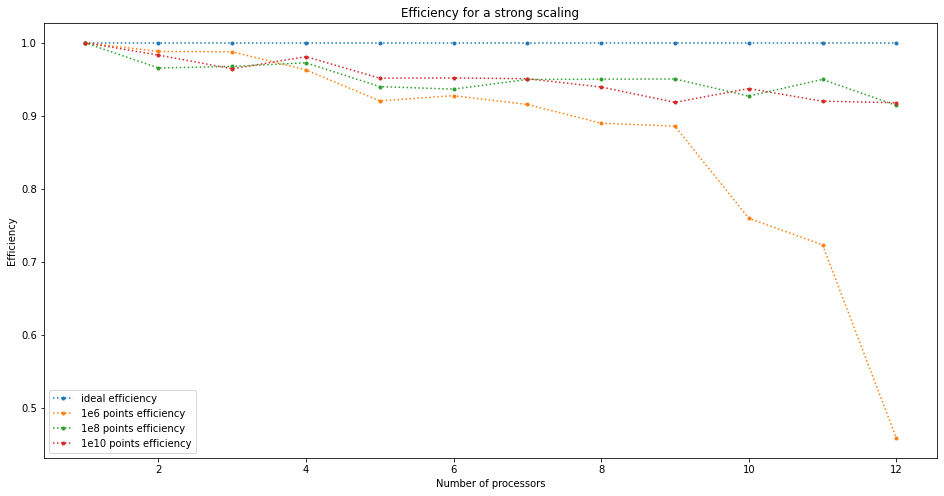

In [65]:
plt.plot(x_processors, np.ones(12), linestyle='dotted', marker='.', label='ideal efficiency')
plt.plot(x_processors, strong_scaling_efficiency_1e6, linestyle='dotted', marker='.', label='1e6 points efficiency')
plt.plot(x_processors, strong_scaling_efficiency_1e8, linestyle='dotted', marker='.', label='1e8 points efficiency')
plt.plot(x_processors, strong_scaling_efficiency_1e10, linestyle='dotted', marker='.', label='1e10 points efficiency')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Efficiency for a strong scaling")
plt.ylabel("Efficiency")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

### Serial fraction to number of processors

In [66]:
strong_scaling_speedup_1e6 = list(map(lambda x: 1/(x/y_strong_time_1e6[0]), y_strong_time_1e6))
strong_scaling_speedup_1e8 = list(map(lambda x: 1/(x/y_strong_time_1e8[0]), y_strong_time_1e8))
strong_scaling_speedup_1e10 = list(map(lambda x: 1/(x/y_strong_time_1e10[0]), y_strong_time_1e10))

strong_scaling_serial_fraction_1e6 = list(map(lambda x: (1/x[0] - 1/x[1]) / (1 - 1/x[1]), list(zip(strong_scaling_speedup_1e6[1:], x_processors[1:]))))
strong_scaling_serial_fraction_1e8 = list(map(lambda x: (1/x[0] - 1/x[1]) / (1 - 1/x[1]), list(zip(strong_scaling_speedup_1e8[1:], x_processors[1:]))))
strong_scaling_serial_fraction_1e10 = list(map(lambda x: (1/x[0] - 1/x[1]) / (1 - 1/x[1]), list(zip(strong_scaling_speedup_1e10[1:], x_processors[1:]))))

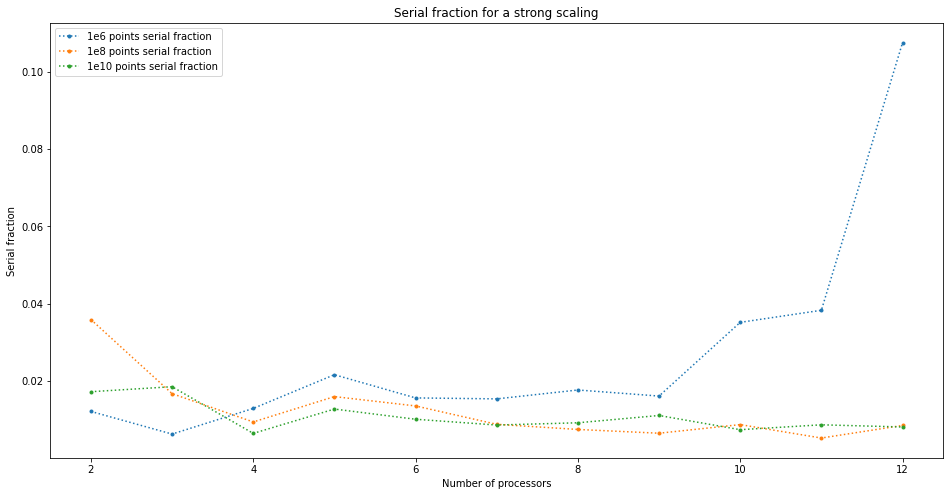

In [67]:
plt.plot(x_processors[1:], strong_scaling_serial_fraction_1e6, linestyle='dotted', marker='.', label='1e6 points serial fraction')
plt.plot(x_processors[1:], strong_scaling_serial_fraction_1e8, linestyle='dotted', marker='.', label='1e8 points serial fraction')
plt.plot(x_processors[1:], strong_scaling_serial_fraction_1e10, linestyle='dotted', marker='.', label='1e10 points serial fraction')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Serial fraction for a strong scaling")
plt.ylabel("Serial fraction")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

## Part 2.2: Weak scaling

### Time to number of processors

In [68]:
y_weak_time_1e6 = np.array([])
y_weak_time_1e8 = np.array([])
y_weak_time_1e10 = np.array([])

y_weak_time_1e6_error = np.array([])
y_weak_time_1e8_error = np.array([])
y_weak_time_1e10_error = np.array([])

for name in weak_results_time_1e6:
    result_mean = statistics.mean(weak_results_time_1e6[name])
    y_weak_time_1e6 = np.append(y_weak_time_1e6, result_mean)
    
    result_stdev = statistics.stdev(weak_results_time_1e6[name])
    y_weak_time_1e6_error = np.append(y_weak_time_1e6_error, result_stdev)

for name in weak_results_time_1e8:
    result_mean = statistics.mean(weak_results_time_1e8[name])
    y_weak_time_1e8 = np.append(y_weak_time_1e8, result_mean)
    
    result_stdev = statistics.stdev(weak_results_time_1e8[name])
    y_weak_time_1e8_error = np.append(y_weak_time_1e8_error, result_stdev)

for name in weak_results_time_1e10:
    result_mean = statistics.mean(weak_results_time_1e10[name])
    y_weak_time_1e10 = np.append(y_weak_time_1e10, result_mean)
    
    result_stdev = statistics.stdev(weak_results_time_1e10[name])
    y_weak_time_1e10_error = np.append(y_weak_time_1e10_error, result_stdev)

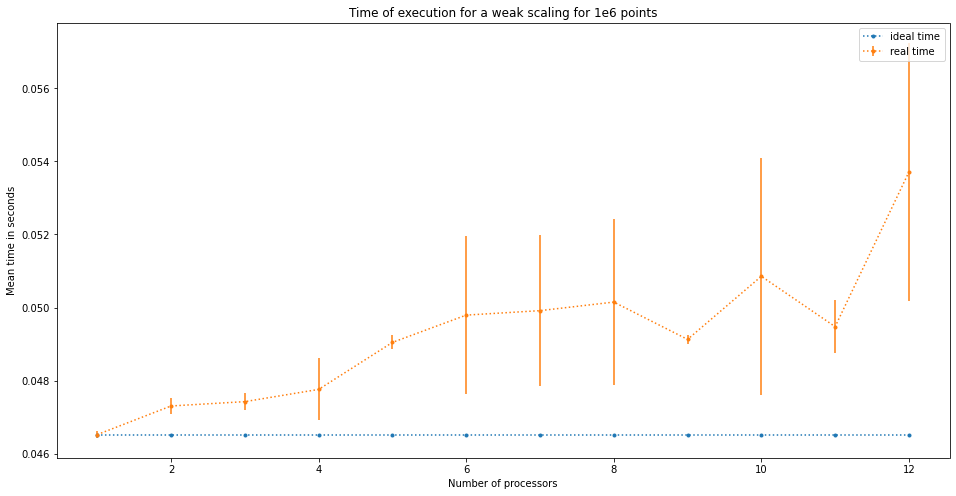

In [70]:
ideal_time = list(map(lambda x: y_weak_time_1e6[0], x_processors))

plt.plot(x_processors, ideal_time, linestyle='dotted', marker='.', label='ideal time')
plt.errorbar(x_processors, y_weak_time_1e6, y_weak_time_1e6_error, linestyle='dotted', marker='.', label='real time')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Time of execution for a weak scaling for 1e6 points")
plt.ylabel("Mean time in seconds")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

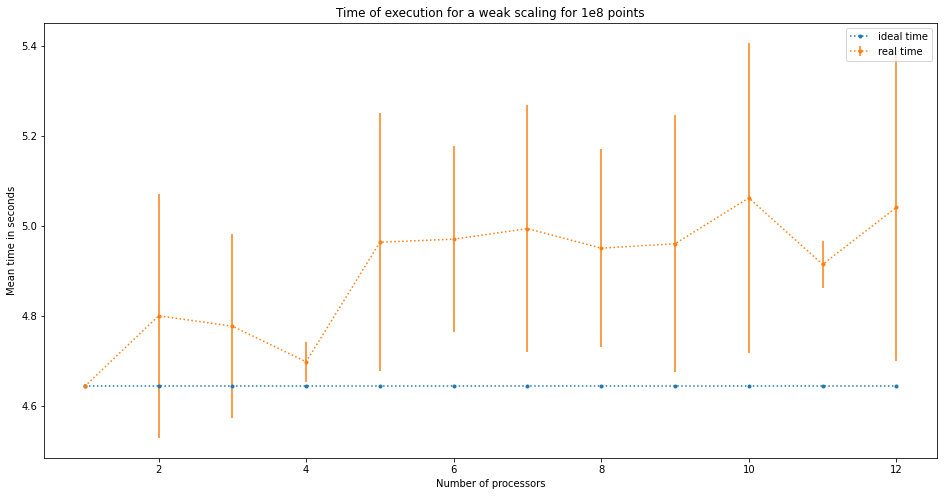

In [71]:
ideal_time = list(map(lambda x: y_weak_time_1e8[0], x_processors))

plt.plot(x_processors, ideal_time, linestyle='dotted', marker='.', label='ideal time')
plt.errorbar(x_processors, y_weak_time_1e8, y_weak_time_1e8_error, linestyle='dotted', marker='.', label='real time')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Time of execution for a weak scaling for 1e8 points")
plt.ylabel("Mean time in seconds")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

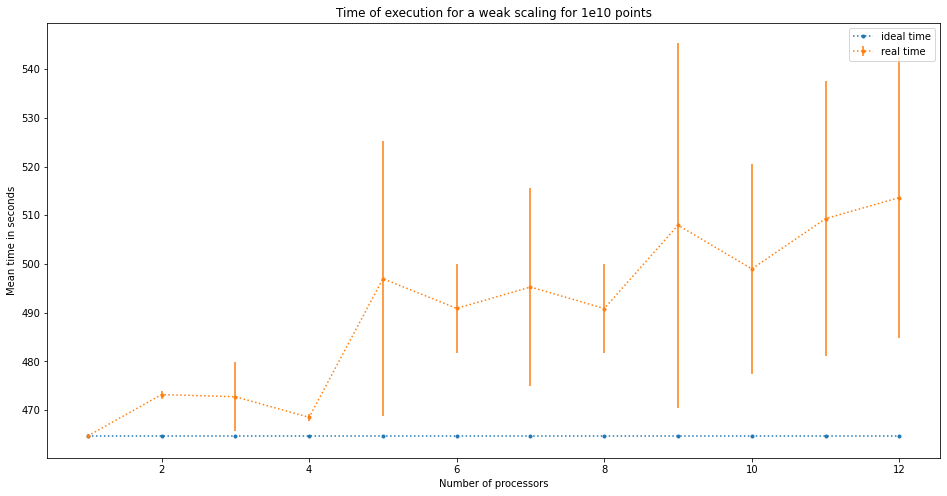

In [72]:
ideal_time = list(map(lambda x: y_weak_time_1e10[0], x_processors))

plt.plot(x_processors, ideal_time, linestyle='dotted', marker='.', label='ideal time')
plt.errorbar(x_processors, y_weak_time_1e10, y_weak_time_1e10_error, linestyle='dotted', marker='.', label='real time')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Time of execution for a weak scaling for 1e10 points")
plt.ylabel("Mean time in seconds")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

### Speedup to number of processors

In [77]:
weak_scaling_speedup_1e6 = list(map(lambda x: y_weak_time_1e6[0]/x, y_weak_time_1e6))
weak_scaling_speedup_1e6 = weak_scaling_speedup_1e6 * x_processors

weak_scaling_speedup_1e8 = list(map(lambda x: y_weak_time_1e8[0]/x, y_weak_time_1e8))
weak_scaling_speedup_1e8 = weak_scaling_speedup_1e8 * x_processors

weak_scaling_speedup_1e10 = list(map(lambda x: y_weak_time_1e10[0]/x, y_weak_time_1e10))
weak_scaling_speedup_1e10 = weak_scaling_speedup_1e10 * x_processors

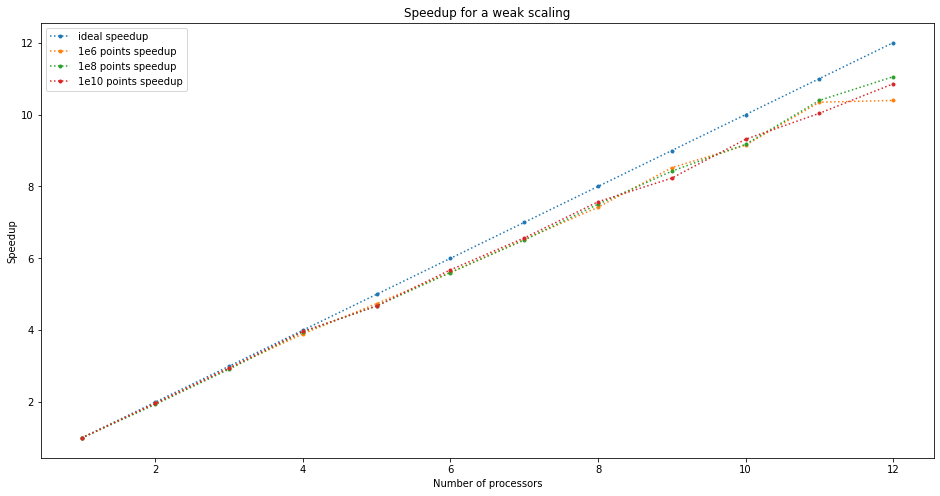

In [78]:
plt.plot(x_processors, x_processors, linestyle='dotted', marker='.', label='ideal speedup')
plt.plot(x_processors, weak_scaling_speedup_1e6, linestyle='dotted', marker='.', label='1e6 points speedup')
plt.plot(x_processors, weak_scaling_speedup_1e8, linestyle='dotted', marker='.', label='1e8 points speedup')
plt.plot(x_processors, weak_scaling_speedup_1e10, linestyle='dotted', marker='.', label='1e10 points speedup')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Speedup for a weak scaling")
plt.ylabel("Speedup")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

### Efficiency to number of processors

In [81]:
weak_scaling_speedup_1e6 = list(map(lambda x: y_weak_time_1e6[0]/x, y_weak_time_1e6))
weak_scaling_speedup_1e6 = weak_scaling_speedup_1e6 * x_processors

weak_scaling_speedup_1e8 = list(map(lambda x: y_weak_time_1e8[0]/x, y_weak_time_1e8))
weak_scaling_speedup_1e8 = weak_scaling_speedup_1e8 * x_processors

weak_scaling_speedup_1e10 = list(map(lambda x: y_weak_time_1e10[0]/x, y_weak_time_1e10))
weak_scaling_speedup_1e10 = weak_scaling_speedup_1e10 * x_processors

weak_scaling_efficiency_1e6 = weak_scaling_speedup_1e6 / x_processors
weak_scaling_efficiency_1e8 = weak_scaling_speedup_1e8 / x_processors
weak_scaling_efficiency_1e10 = weak_scaling_speedup_1e10 / x_processors

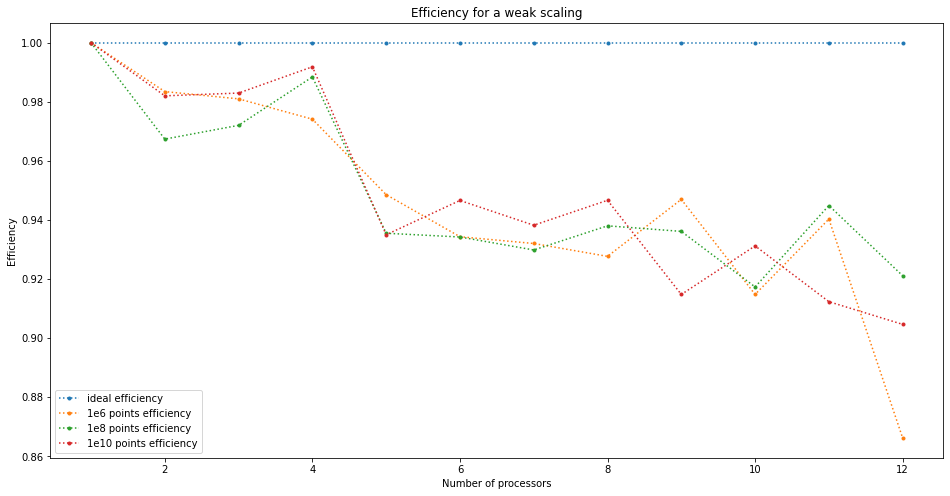

In [82]:
plt.plot(x_processors, np.ones(12), linestyle='dotted', marker='.', label='ideal efficiency')
plt.plot(x_processors, weak_scaling_efficiency_1e6, linestyle='dotted', marker='.', label='1e6 points efficiency')
plt.plot(x_processors, weak_scaling_efficiency_1e8, linestyle='dotted', marker='.', label='1e8 points efficiency')
plt.plot(x_processors, weak_scaling_efficiency_1e10, linestyle='dotted', marker='.', label='1e10 points efficiency')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Efficiency for a weak scaling")
plt.ylabel("Efficiency")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

### Serial fraction to number of processors

In [85]:
weak_scaling_speedup_1e6 = list(map(lambda x: y_weak_time_1e6[0]/x, y_weak_time_1e6))
weak_scaling_speedup_1e6 = weak_scaling_speedup_1e6 * x_processors

weak_scaling_speedup_1e8 = list(map(lambda x: y_weak_time_1e8[0]/x, y_weak_time_1e8))
weak_scaling_speedup_1e8 = weak_scaling_speedup_1e8 * x_processors

weak_scaling_speedup_1e10 = list(map(lambda x: y_weak_time_1e10[0]/x, y_weak_time_1e10))
weak_scaling_speedup_1e10 = weak_scaling_speedup_1e10 * x_processors

weak_scaling_serial_fraction_1e6 = list(map(lambda x: (1/x[0] - 1/x[1]) / (1 - 1/x[1]), list(zip(weak_scaling_speedup_1e6[1:], x_processors[1:]))))
weak_scaling_serial_fraction_1e8 = list(map(lambda x: (1/x[0] - 1/x[1]) / (1 - 1/x[1]), list(zip(weak_scaling_speedup_1e8[1:], x_processors[1:]))))
weak_scaling_serial_fraction_1e10 = list(map(lambda x: (1/x[0] - 1/x[1]) / (1 - 1/x[1]), list(zip(weak_scaling_speedup_1e10[1:], x_processors[1:]))))

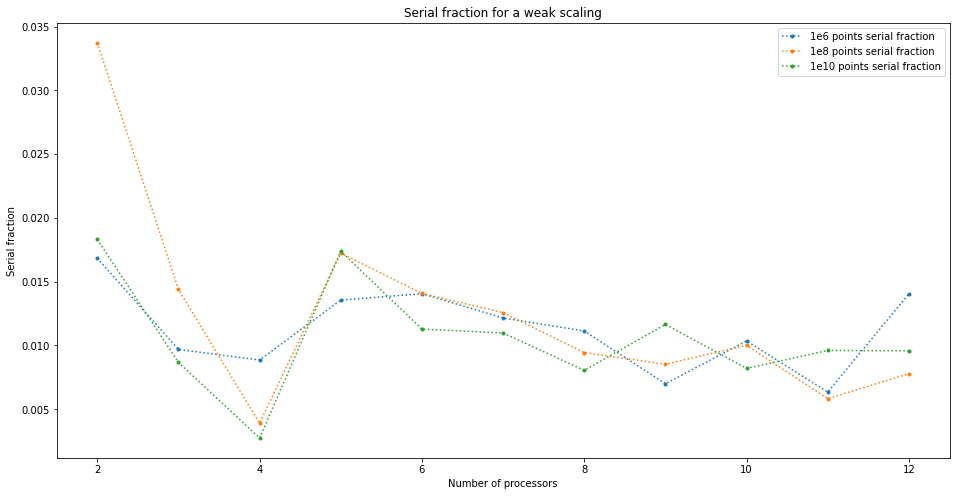

In [86]:
plt.plot(x_processors[1:], weak_scaling_serial_fraction_1e6, linestyle='dotted', marker='.', label='1e6 points serial fraction')
plt.plot(x_processors[1:], weak_scaling_serial_fraction_1e8, linestyle='dotted', marker='.', label='1e8 points serial fraction')
plt.plot(x_processors[1:], weak_scaling_serial_fraction_1e10, linestyle='dotted', marker='.', label='1e10 points serial fraction')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title("Serial fraction for a weak scaling")
plt.ylabel("Serial fraction")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

# Report [PL]

Pomiary zostały zebrane 31 marca 2021r.<br>
Kod źródłowy: https://github.com/Mlokos/ParallelProgramming/tree/master/lab3

## Ogólne

Dla każdego wykresu obliczane było przyspieszenie względne (względem czasu wykonania na jednym procesorze).<br>
Przy wyliczaniu czasu wykonania programu nie łączyłem wykresów w jeden, ponieważ uznałem że niewiele to wnosi i wpływa tylko na pogorszenie czytelności.

## Skalowanie silnie

#### Czas wykonania się zadania
Wraz ze wzrostem rozmiaru problemu malała wariancja przy pomiarach. Można przez to zauważyć, że część sekwencyjna miała coraz mniejszy wpływ na różnice w czasie wykonania.<br>
Ciekawe wyniki otrzymałem dla 'małego' problemu (1e6 punktów), gdzie czas wykonania się programu na 9 procesorach był mniejszy niż kiedy wywoływał się dla 10, 11 i 12.

#### Przyspieszenie
Tę analizę mogę podzielić na dwie części - pierwsza dla problemu średniego i dużego (gdzie liczba punktów wynosiła 1e8 lub 1e10); oraz drugą - dla małego (dla liczby punktów równej 1e6).<br>
W przypadku problemu średniego i dużego funkcja zachowuje się zgodnie z przewidywaniami - wraz ze wzrostem liczby procesorów rośnie przyspieszenie w sposób prawie wprost proporcjonalny (niewielki spadek względem 'idealnego' zachowania wynika ze zwiększonej części sekwencyjnej, wynikającej z komunikacji).<br>
Przypadek mały wyróżnia się wględem średniego i dużego gwałtownym odchyłem od teoretycznego przyspieszenia już dla 10 procesorów. Dzięki temu można zaobserwować że przy małym problemie zwiększenie liczby node'ów nie zawsze jest dobrym pomysłem - wpływa to na dodatkowy narzut komunikacyjny.

#### Efektywność
Efektywność jest zmienną ściśle związaną z przyspieszeniem i jak się można było spodziewać, zachowuje się podobnie.<br>
Dla problemu średniego i dużego efektywność nie zmniejszała się zbytnio na przestrzeni 12 node'ów, utrzymując się na poziomie 92%.<br>
Dla problemu o małym rozmiarze zaobserwowałem gwałtowny spadek między wykorzystaniem 9 a 10 node'ów: efektywność spadła z 90% do 75%. Przy 12 node'ach efektywnośc była już na poziomie poniżej 50%.

#### Część sekwencyjna
Dla problemu średniego i dużego część sekwencyjna utrzymywała się na poziomie 1 - 2%.<br>
Dla problemu małego część sekwencyjna utrzymywała się na poziomie 2% do 9 node'ów. Przy 10 i 11 skoczyła do 4%, a przy 12 wynosiła już ponad 10%.

## Skalowanie słabe

#### Czas wykonania się zadania
W idealnym przypadku czas wykonania się programu powinien być taki sam, niezależnie od ilości użytych node'ów. Oczywiście taka sytuacja nie może wystąpić, ponieważ wraz ze wzrostem ilości node'ów zwiększa się też ilość komunikacji między nimi.<br>
Zależność tę dobrze widać na grafach, gdzie średni czas wykonania się programu rośnie wraz z ilością wykorzystywanych node'ów, a sama wariancja utrzymuje się na podobnym, dużym, poziomie.

#### Przyspieszenie
W odróżnieniu od skalowania silnego, w skalowaniu słabym przyspieszenie zachowywało się podobnie tak dla problemu małego jak i średniego czy dużego.<br>
Do czterech node'ów wartość przyspieszenia prawie pokrywała się z 'idealnym' przypadkiem (mogło to wynikać z samej architektury clustra i czterowątkowego procesora - oszczędność na komunikacji po sieci).

#### Efektywność
Efektywność dla wszystkich problemów utrzymywała się na wysokim poziomie.<br>
Dla problemów średniego i dużego nigdy nie spadła poniżej 90%, a dla małego najmniejsza wartość wyniosła 86% (w skalowaniu silnym dla małego problemu najmniejsza efektywność wynosiła mniej niż 50%!)

#### Część sekwencyjna
Dla wszystkich rodzai problemów część sekwencyjna utrzymywała się na poziomie 1 - 2%.<br>
Dla 4 node'ów i problemów o rozmiarze średnim i dużym, część sekwencyjna wyniosła mniej niż 0.5%!